In [1]:
import iris
#import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class compute_mean_std:
    def __init__(self, filename):
        self.filename = filename
        self.dataset = np.ma.masked_invalid(np.loadtxt(f'data/{self.filename}', usecols=2))    
    
    def mean_M1(self):
        return np.sum(self.dataset)/(len(self.dataset)-np.sum(self.dataset.mask))
    
    def mean_M2(self):
        i_sum = 0
        for i in range (0,len(self.dataset.data)):
            i_sum = self.dataset.data[i]+i_sum
        return i_sum/(len(self.dataset.data))

    def mean_M2nan(self):
        i_sum = 0
        for i in range (0,len(self.dataset)):
            if np.isnan(self.dataset.data[i]):
                continue
            i_sum = self.dataset.data[i]+i_sum

        return i_sum/(len(self.dataset.data)-np.isnan(self.dataset.data).sum())

    def mean_M3(self):
        return np.average(self.dataset)

    def mean_M3nan(self):
        return np.nanmean(self.dataset)

    def std_M1(self):
        return np.sqrt(np.sum((self.dataset - self.mean_M3())**2)/(len(self.dataset)-np.sum(self.dataset.mask)-1))

    def std_M2(self):
        i_std = 0
        for i in range (0,len(self.dataset.data)):
            if np.isnan(self.dataset.data[i]):
                continue
            i_std = (self.dataset.data[i]-self.mean_M3())**2 +i_std
        return np.sqrt(i_std/(len(self.dataset.data)-np.isnan(self.dataset.data).sum()-1))

    def std_M3(self):
        return np.std(self.dataset, ddof=1)

### Dataset 1

In [5]:
d1 = compute_mean_std('ERA5_2m_SAT_TS_1990_2023.txt')

#### Mean Calculation

In [6]:
d1.mean_M1()

285.9834887990196

In [7]:
d1.mean_M2()

285.9834887990198

In [8]:
d1.mean_M2nan()

285.9834887990198

In [9]:
d1.mean_M3()

285.9834887990196

In [10]:
d1.mean_M3nan()

285.9834887990196

#### Standard Deviation

In [11]:
d1.std_M1()

6.767065220728146

In [12]:
d1.std_M2()

6.767065220728146

In [13]:
d1.std_M3()

6.767065220728146

### Dataset 1

In [14]:
d2 = compute_mean_std('ERA5_2m_SAT_TS_1990_2023_nan.txt')

#### Mean

In [15]:
d2.mean_M1()

285.9881768058968

In [16]:
d2.mean_M2()

nan

In [17]:
d2.mean_M3()

285.9881768058968

In [18]:
d2.mean_M2nan()

285.988176805897

In [19]:
d2.mean_M3nan()

285.9881768058968

### Standard Deviation Calculation

In [20]:
d2.std_M1()

6.7747305405131195

In [21]:
d2.std_M2()

6.774730540513114

In [22]:
d2.std_M3()

6.7747305405131195

### Working with NetCDF files

In [34]:
class compute_mean_std_nc:
    def __init__(self, filename):
        self.filename = filename
        self.dataset = iris.load_cube(f'data/{self.filename}')    
    
    def compute_mean_nc(self):
        i_sum=0
        for i in range(0, len(self.dataset.data)):
            i_sum = self.dataset[i].data+i_sum
        mean = i_sum/len(self.dataset.data)
        print(f'own_function_mean = {mean}')

        print(f'numpy_mean = {np.mean(self.dataset.data)}')

        self.mean =  self.dataset.collapsed('time', iris.analysis.MEAN)
        print(f'iris_mean = {self.mean.data}')

    def compute_std_nc(self):
        i_std=0
        for i in range(0, len(self.dataset.data)):
            i_std = ((self.dataset[i].data) - self.mean.data)**2 + i_std
        std = np.sqrt(i_std/(len(self.dataset.data)-1))
        print(f'own_function_std = {std}')

        print(f'numpy_std = {np.std(self.dataset.data, ddof = 1)}')

        self.std =  self.dataset.collapsed('time', iris.analysis.STD_DEV)
        print(f'iris_std = {self.std.data}')

    def plot(self):
        plt.plot(self.dataset.data)
        plt.axhline(y=self.mean.data, color='r', label=r'$\mu$')
        plt.axhline(y=self.mean.data + 2*self.std.data, color='g', linestyle='--', label=r'+$2 \sigma$')
        plt.axhline(y=self.mean.data - 2*self.std.data, color='g', linestyle='--', label=r'-$2 \sigma$')
        plt.fill_between(range(len(self.dataset.data)), self.mean.data  - 2*self.std.data, self.mean.data  + 2*self.std.data, color='yellow', alpha=0.3)
        plt.title('Time-Series of Trieste near-surface temperature (1990-2023)')
        plt.xlabel('Time')
        plt.ylabel('Temperature (K)')
        plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
        plt.grid(True)
        plt.savefig('TS_L1.png')
        plt.show()

In [35]:
ds = compute_mean_std_nc('ERA5_2m_SAT_TS_1990_2023.nc')

In [36]:
ds.compute_mean_nc()

own_function_mean = 285.98348841947666
numpy_mean = 285.9834899902344
iris_mean = 285.9834899902344


In [37]:
ds.compute_std_nc()

own_function_std = 6.7670651567497835
numpy_std = 6.767065048217773
iris_std = 6.767065048217773


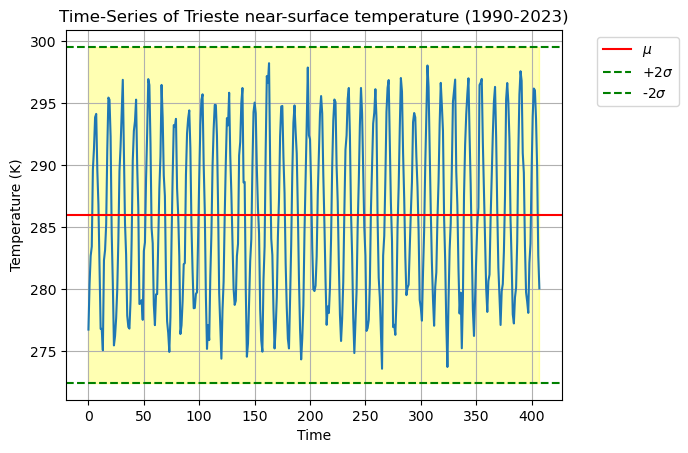

In [38]:
ds.plot()

### Plotting 

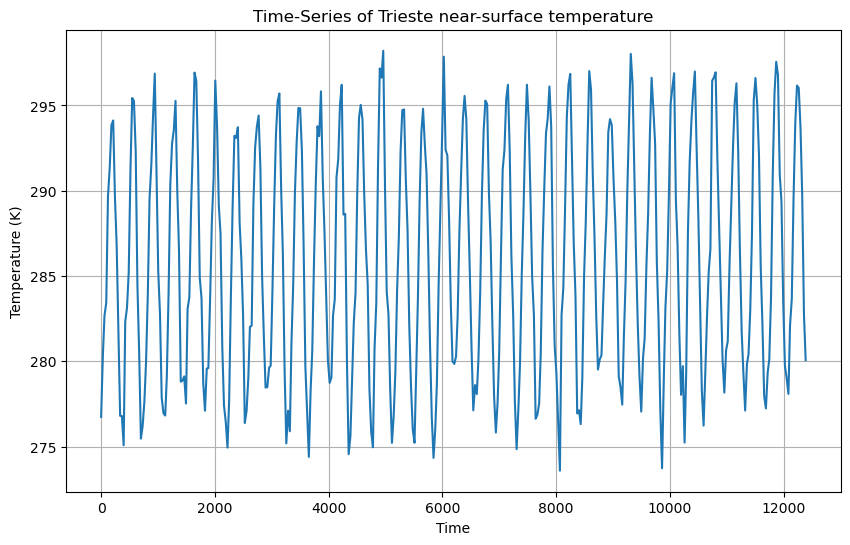

In [32]:
import netCDF4 as nc
# Open the NetCDF file
ds = nc.Dataset('data/ERA5_2m_SAT_TS_1990_2023.nc')

# Assuming your NetCDF file has a variable called 'time' and 'data'
time = ds.variables['time'][:]  # Replace 'time' with the actual name of your time variable
data = ds.variables['t2m'][:]  # Replace 'data' with the actual name of your data variable

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.plot(time, data)
plt.title('Time-Series of Trieste near-surface temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.savefig('TS2_L1.png')
plt.show()